# California Housing prices prediction
## The dataset used on this project can be found on https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [2]:
data = pd.read_csv("./data/housing.csv")

## Features Description
About this file

Add Suggestion
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars) -> TARGET VALUE
10. oceanProximity: Location of the house w.r.t ocean/sea

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Cleaning null values
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Separating the data
One part to train the model and the other to see if the model is performing well(training and testing data)

In [9]:
from sklearn.model_selection import train_test_split
# x is the dataframe without the target values, y is the target value
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) # reservates 20% of the data for testing

## Analysing the training data

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16924,-122.31,37.60,34.0,3225.0,726.0,1958.0,656.0,3.6811,NEAR BAY,273000.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,<1H OCEAN,500001.0
13226,-117.68,34.01,20.0,7326.0,1555.0,5718.0,1538.0,3.2073,INLAND,123500.0
7263,-118.23,33.99,37.0,378.0,176.0,714.0,156.0,2.1912,<1H OCEAN,112500.0
16540,-121.22,37.79,38.0,2152.0,451.0,1320.0,457.0,2.5025,INLAND,101900.0
...,...,...,...,...,...,...,...,...,...,...
15055,-116.92,32.79,24.0,4055.0,742.0,2123.0,744.0,4.5224,<1H OCEAN,142000.0
4053,-118.43,34.15,26.0,2900.0,667.0,1090.0,590.0,3.7125,<1H OCEAN,447400.0
2288,-119.75,36.78,28.0,3257.0,752.0,1981.0,712.0,2.2930,INLAND,71700.0
16419,-121.31,37.90,38.0,226.0,44.0,125.0,38.0,2.9000,INLAND,125000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

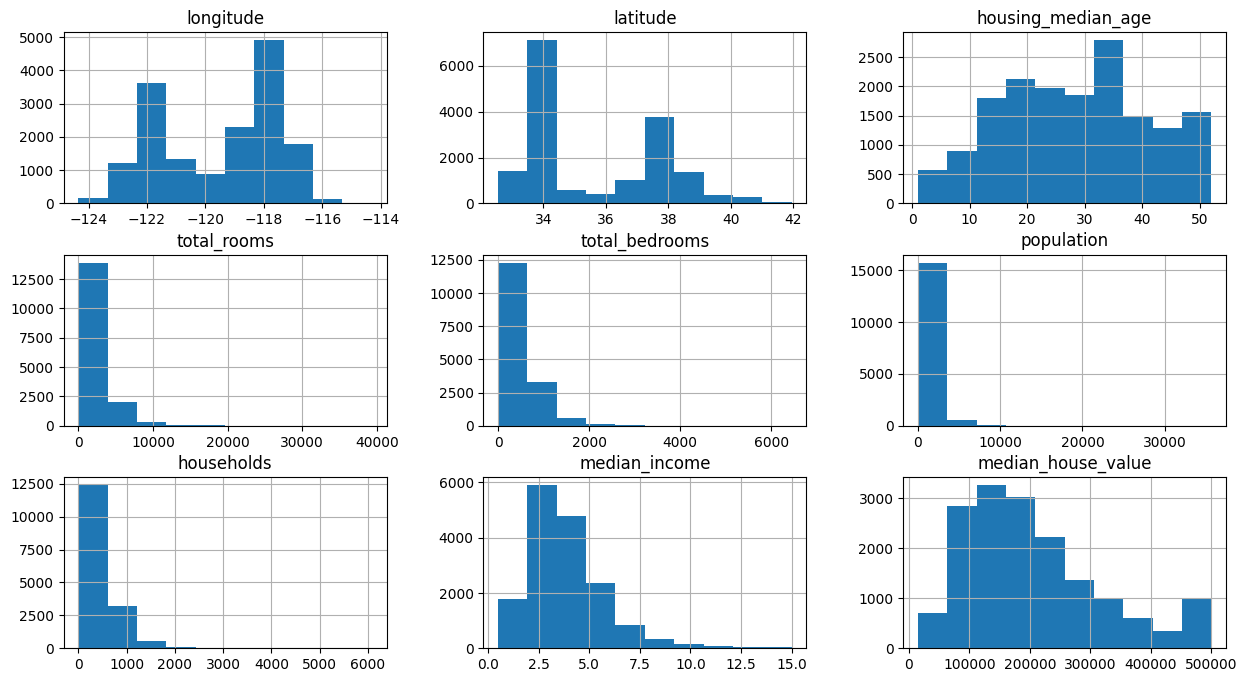

In [14]:
train_data.hist(figsize=(15,8))

## Correlation HeatMap

<Axes: >

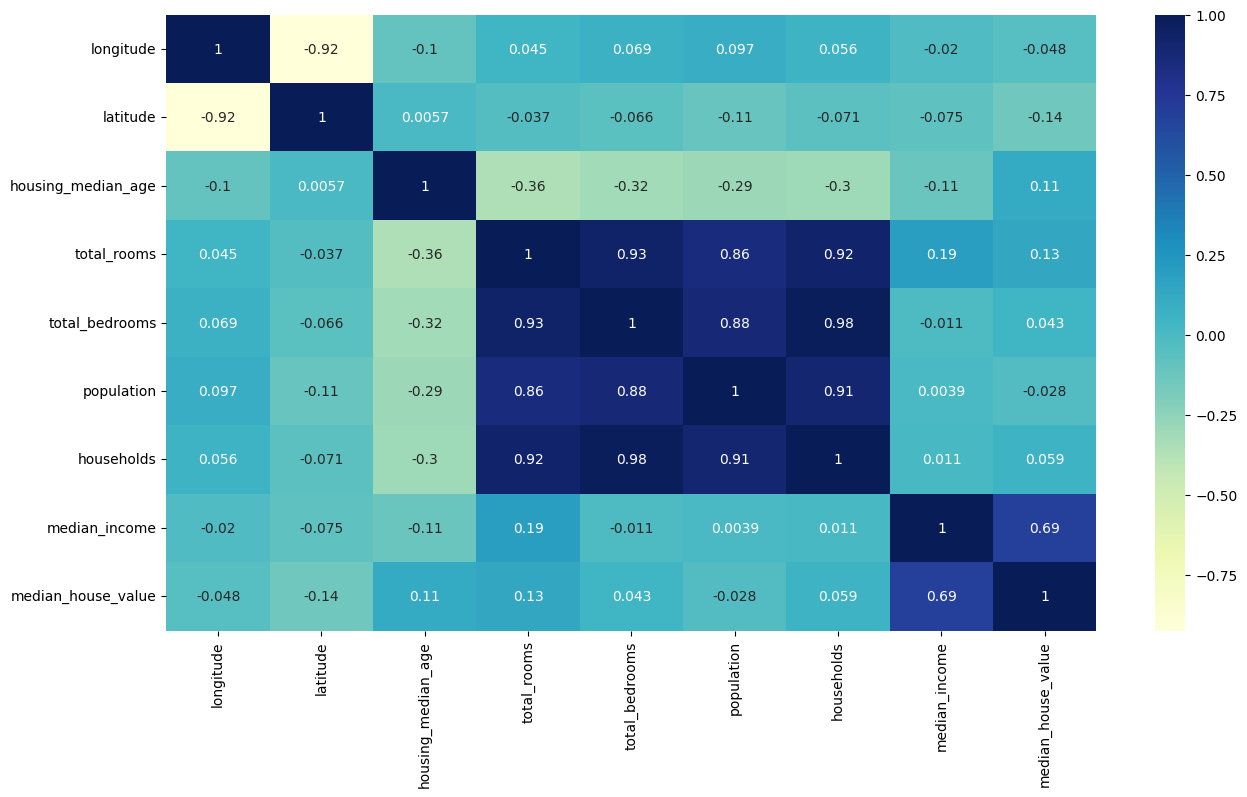

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu") 

Looking at the heatmap, we can see that the median_income_value correlates quite strongly with the median_house_value. Said that, it can be a good predictor for the house value. 

# Data Preprocesing